In [1]:
import numpy as np
import matplotlib.pylab as plt

# manual implimentation:

In [2]:
# RBF:
def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

In [3]:
def conditional(x_new, x, y, params):

    B = exponential_cov(x_new, x, params) # for K**
    C = exponential_cov(x, x, params) # for K
    A = exponential_cov(x_new, x_new, params) # for K*

    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))

    return(mu.squeeze(), sigma.squeeze())

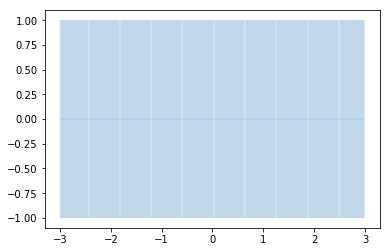

In [4]:
theta = [1, 10] # (hyper) params
sigma0 = exponential_cov(0, 0, theta)
xpts = np.arange(-3, 3, step=0.01) # grid

plt.errorbar(xpts, np.zeros(len(xpts)), yerr=sigma0, capsize=0, alpha = 0.1)

plt.show()

In [5]:
#arbitrary starting point to sample

x = [1.]
y = [np.random.normal(scale=sigma0)]
y

[-1.3324432762739213]

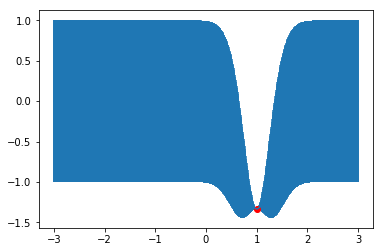

In [6]:
sigma1 = exponential_cov(x, x, theta)
 
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new
 
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, theta, sigma1, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

plt.show()

In [7]:
# sample one more point:

m, s = conditional([-0.7], x, y, theta)
y2 = np.random.normal(m, s)
y2

0.30561691481185166

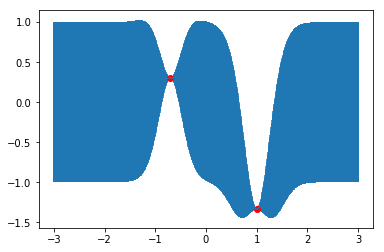

In [8]:
x.append(-0.7)
y.append(y2)
 
sigma2 = exponential_cov(x, x, theta)
predictions = [predict(i, x, exponential_cov, theta, sigma2, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

plt.show()

In [9]:
# Sampel many points:

x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, theta)
y_more = np.random.multivariate_normal(mu, s)
y_more

array([ 0.99207275, -1.24305347, -0.64833716, -0.02036476,  0.33137929])

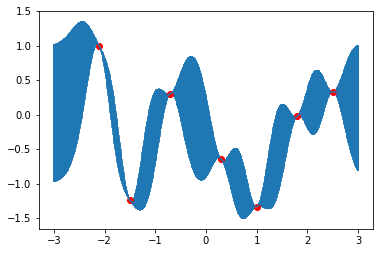

In [10]:
x += x_more
y += y_more.tolist()
 
sigmaNew = exponential_cov(x, x, theta)
predictions = [predict(i, x, exponential_cov, theta, sigmaNew, y) for i in x_pred]
 
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

plt.show()

# Comparison sk-learn, GPflow, PyMC3: 

In [ ]:
# gen som data:

In [78]:
data_x = np.random.uniform(0,10,200)
data_y = np.cos(data_x) + np.random.normal(0,.6,200)

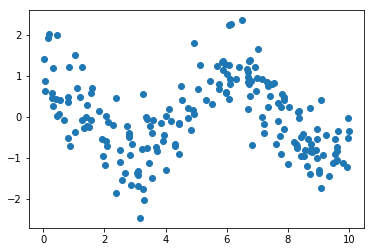

In [79]:
plt.plot(data_x,data_y,'o')
plt.show()